# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



#### 1. Load data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("iris.csv")

#### 2. How many data-ponts and how many features are present?

In [2]:
print (iris.shape)

(150, 5)


#### 3. What are the column names in our dataset?

In [3]:
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


#### 3. How many data points for each class are present? 

In [4]:
iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

#### 4. Is this a balanced dataset?

This is a balanced dataset as the number of data points for every class is 50.

# (3.2) 2-D Scatter Plot

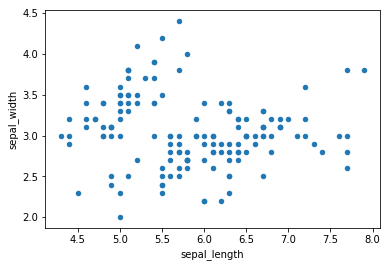

In [5]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

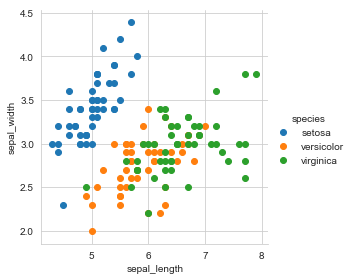

In [6]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", height=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

In [7]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.sampledata.iris import flowers

colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
         color=colors, fill_alpha=0.2, size=10)

output_notebook()

show(p)

Loading BokehJS ...

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

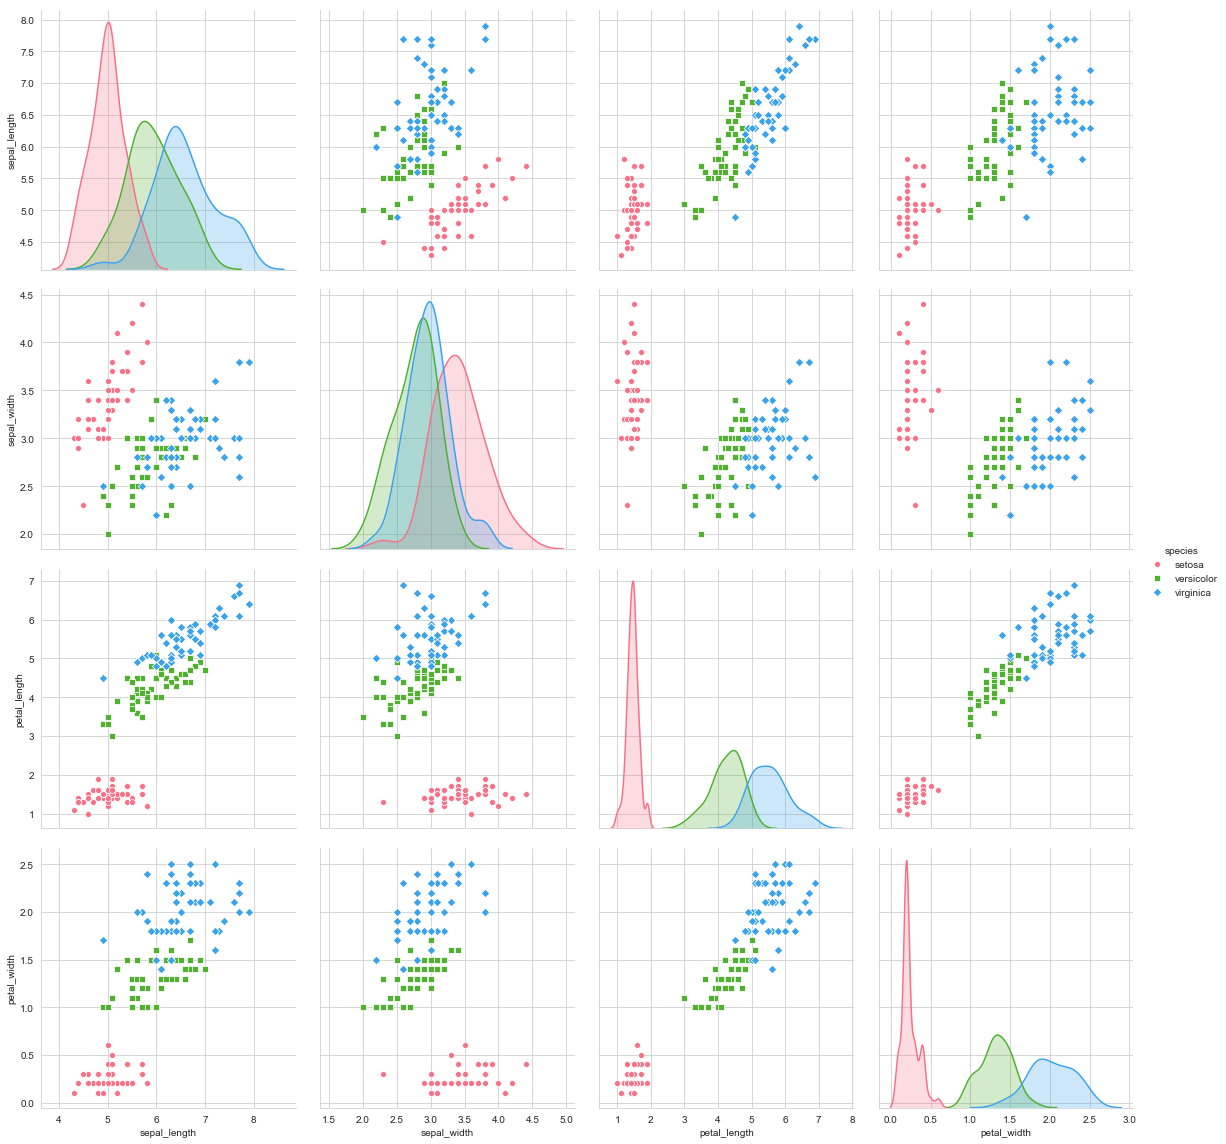

In [8]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", palette="husl", height=4,  markers=["o", "s", "D"])
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (3.4) Histogram, PDF, CDF
https://statisticsbyjim.com/basics/histograms/

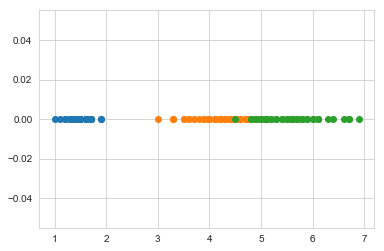

In [9]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

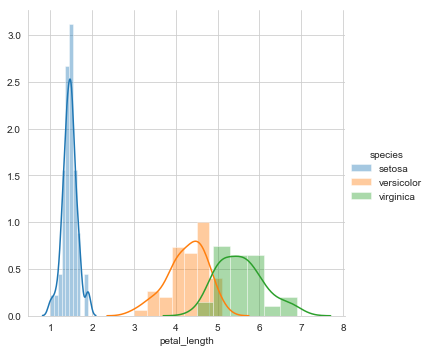

In [10]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();

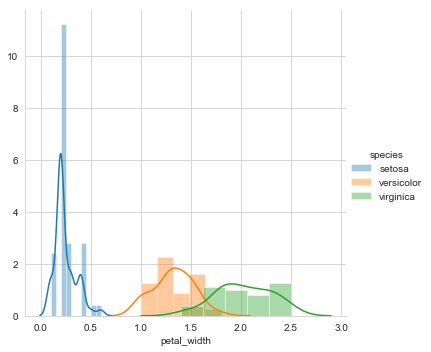

In [11]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

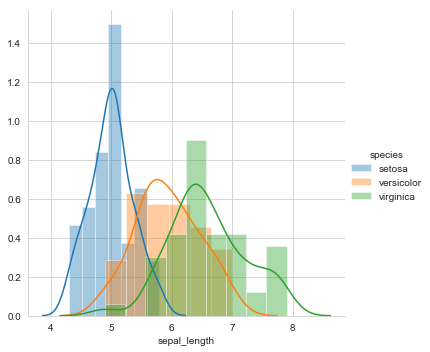

In [12]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

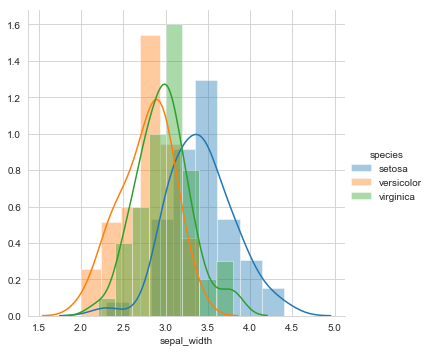

In [13]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

In [14]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


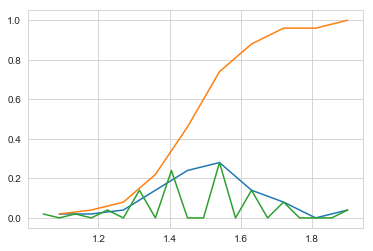

In [15]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


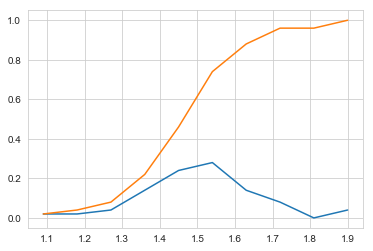

In [16]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


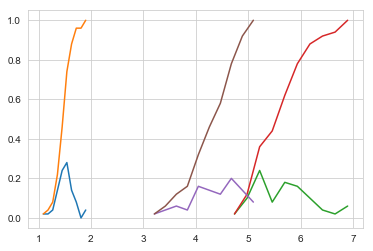

In [17]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# (3.5) Mean, Variance and Std-dev

### Mean

In [22]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

Means:
1.464
2.4156862745098038
5.552
4.26


<span class="mark">In a symmetric distribution, the mean locates the center accurately</span>.

However, in a skewed distribution, the mean can miss the mark   
This problem occurs because <span class="pirk">outliers have a substantial impact on the mean. Extreme values in an extended tail pull the mean away from the center.</span> As the distribution becomes more skewed, the mean is drawn further away from the center.
 
 <span class="birk">**When to use the mean:** Symmetric distribution, Continuous data</span>

### Variance


Variance is the average squared difference of the values from the mean. Unlike the previous measures of variability, the variance includes all values in the calculation by comparing each value to the mean. 

There are two formulas for the variance depending on whether you are calculating the variance for an entire population or using a sample to [estimate](https://statisticsbyjim.com/glossary/estimator/) the population variance. The equations are below, and then I work through an example in a table to help bring it to life.

#### Population variance

The formula for the variance of an entire population is the following:

![Equation for the population variance](https://i2.wp.com/statisticsbyjim.com/wp-content/uploads/2018/03/equation_for_population_variance.gif?resize=141%2C61)

In the equation, σ<sup>2</sup> is the population [parameter](https://statisticsbyjim.com/glossary/parameter/) for the variance, μ is the parameter for the population mean, and N is the number of data points, which should include the entire population.

#### Sample variance

To use a sample to estimate the variance for a population, use the following formula. Using the previous equation with sample data tends to underestimate the variability. Because it’s usually impossible to measure an entire population, [statisticians](https://statisticsbyjim.com/glossary/statistics/) use the equation for sample variances much more frequently.

![Equation for the sample variance.](https://i1.wp.com/statisticsbyjim.com/wp-content/uploads/2018/03/equation_for_sample_variance.gif?resize=139%2C65)

In the equation, s<sup>2</sup> is the sample variance, and M is the sample mean. N-1 in the denominator corrects for the tendency of a sample to underestimate the population variance.

Because the calculations use the squared differences, the variance is in squared units rather the original units of the data. <span class="burk">While higher values of the variance indicate greater variability, there is no intuitive interpretation for specific values. Despite this limitation, various statistical tests use the variance in their calculations. For an example, read my post about the [F-test and ANOVA](https://statisticsbyjim.com/anova/f-tests-anova/)</span>.

While it is difficult to interpret the variance itself, the standard deviation resolves this problem!

### Standard Deviation

The standard deviation is the standard or typical difference between each data point and the mean. <span class="mark">When the values in a dataset are grouped closer together, you have a smaller standard deviation. On the other hand, when the values are spread out more, the standard deviation is larger because the standard distance is greater</span>.

Conveniently, the standard deviation uses the original units of the data, which makes interpretation easier. Consequently, <span class="pirk">the standard deviation is the most widely used measure of variability</span>. For example, in the pizza delivery example, a standard deviation of 5 indicates that the typical delivery time is plus or minus 5 minutes from the mean. It’s often reported along with the mean: 20 minutes (s.d. 5).

The standard deviation is just the square root of the variance. Recall that the variance is in squared units. Hence, the square root returns the value to the natural units. The symbol for the standard deviation as a population parameter is σ while s represents it as a sample estimate. To calculate the standard deviation, calculate the variance as shown above, and then take the square root of it. Voila! You have the standard deviation!

In the variance section, we calculated a variance of 201 in the table.

### The Empirical Rule for the Standard Deviation of a Normal Distribution

<span class="pirk">When you have normally distributed data, or approximately so, the standard deviation becomes particularly valuable.</span>   

You can use it to determine the proportion of the values that fall within a specified number of standard deviations from the mean.   
For example, <span class="birk">in a normal distribution, 68% of the values will fall within +/- 1 standard deviation from the mean. 
This property is part of the Empirical Rule</span>.   
This rule describes the percentage of the data that fall within specific numbers of standard deviations from the mean for bell-shaped curves.                  

**[Mean](https://statisticsbyjim.com/glossary/mean/) +/- standard deviations** | **Percentage of data contained**
------------------------------------------------------------------------------ | --------------------------------
1                                                                              | 68%                             
2                                                                              | 95%                             
3                                                                              | 99.7%                           

Let’s take another 

In [23]:
print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))


Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


# (3.6) Median, Percentile, Quantile, IQR, MAD

## Median

The median is the middle value. It is the value that splits the dataset in half. <span class="pirk">To find the median, order your data from smallest to largest, and then find the data point that has an equal amount of values above it and below it</span>. The method for locating the median varies slightly depending on whether your dataset has an even or odd number of values. I’ll show you how to find the median for both cases. In the examples below, I use whole numbers for simplicity, but you can have decimal places.

In the dataset with the odd number of observations, notice how the number 12 has six values above it and six below it. Therefore, 12 is the median of this dataset.

![Data set with an odd number of values for finding the median.](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2018/02/median_odd.png?resize=90%2C312)

When there is an even number of values, you count in to the two innermost values and then take the average. The average of 27 and 29 is 28. Consequently, 28 is the median of this dataset.

![Data set with an even number of observations for finding the median.](https://i1.wp.com/statisticsbyjim.com/wp-content/uploads/2018/02/median_even_observations.png?resize=89%2C333)

<span class="girk">[Outliers](https://statisticsbyjim.com/glossary/outliers/) and [skewed data](https://statisticsbyjim.com/glossary/skewed-data/) have a smaller [effect](https://statisticsbyjim.com/glossary/effect/) on the median.</span> To understand why, imagine we have the [Median](https://statisticsbyjim.com/glossary/median/) dataset below and find that the median is 46. However, we discover data entry errors and need to change four values, which are shaded in the Median Fixed dataset. We’ll make them all significantly higher so that we now have a skewed distribution with large outliers.

![Data set that shows how outliers have a smaller effect on the median as a measure of central tendency.](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2018/02/median_outliers.png?resize=153%2C314)

As you can see, the median doesn’t change at all. It is still 46. <span class="birk">Unlike the mean, the median value doesn’t depend on all the values in the dataset. Consequently, when some of the values are more extreme, the effect on the median is smaller</span>. Of course, with other types of changes, the median can change. <span class="mark">When you have a skewed distribution, the median is a better measure of central tendency than the mean.</span>

### Comparing the mean and median

Now, let’s test the median on the symmetrical and skewed distributions to see how it performs, and I’ll include the mean on the histograms so we can make comparisons.

![Histogram that shows a continuous, symmetric distribution. The mean and median are approximately equal and accurately locate the center of the distribution.](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2018/02/histo_sym_cont_values.png?resize=576%2C384)

<span class="pirk">In a symmetric distribution, the mean and median both find the center accurately. They are approximately equal.</span>

![Histogram that shows a continuous, skewed distribution. The outliers n the distribution tail pull the mean from the center. The median better represents the middle of this dataset.](https://i2.wp.com/statisticsbyjim.com/wp-content/uploads/2018/02/histo_skewed_cont_values.png?resize=576%2C384)

<span class="mark">In a skewed distribution, the outliers in the tail pull the mean away from the center towards the longer tail</span>. For this example, the mean and median differ by over 9000, and the median better represents the central tendency for the distribution.

These data are based on the U.S. household income for 2006. Income is the classic example of when to use the median because it tends to be skewed. The median indicates that half of all incomes fall below 27581, and half are above it. For these data, the mean overestimates where most household incomes fall.

**<span class="girk">When to use the median**: [Skewed](https://statisticsbyjim.com/glossary/skewed-data/) distribution, Continuous data, [Ordinal data</span>](https://statisticsbyjim.com/glossary/ordinal-variables/)

In [24]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


Medians:
1.5
1.5
5.55
4.35


In [25]:

print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


## Which is Best—the Range, Interquartile Range, or Standard Deviation?

First off, you probably notice that I didn’t include the variance as one of the options in the heading above. That’s because the variance is in squared units and doesn’t provide an intuitive interpretation. So, I’ve crossed that off the list. Let’s go over the other three measures of variability.

When you are <span class="pirk">comparing samples that are the same size, consider using the range</span> as the measure of variability. It’s a reasonably intuitive statistic. Just be aware that <span class="pirk">a single [outlier](https://statisticsbyjim.com/glossary/outliers/) can throw the range off. The range is particularly suitable for small samples when you don’t have enough data to calculate the other measures reliably</span>, and the likelihood of obtaining an outlier is also lower.

When you have <span class="birk">a skewed distribution, the median is a better measure of central tendency, and it makes sense to pair it with either the interquartile range or other percentile-based ranges because all of these statistics divide the dataset into groups with specific proportions</span>.

For <span class="girk">normally distributed data, or even data that aren’t terribly skewed, using the tried and true combination reporting the mean and the standard deviation is the way to go. This combination is by far the most common</span>. You can <span class="mark">still supplement this approach with percentile-base ranges as you need.</span>

# (3.7) Box plot and Whiskers

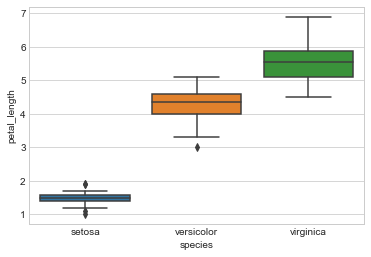

In [0]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# (3.8) Violin plots

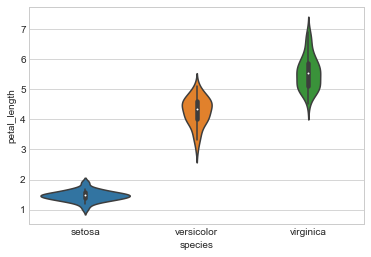

In [0]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

# (3.9) Summarizing plots in english
* Exaplain your findings/conclusions in plain english
* Never forget your objective (the probelm you are solving) . Perform all of your EDA aligned with your objectives.

# (3.10) Univariate, bivariate and multivariate analysis.

In [0]:


Def: Univariate, Bivariate and Multivariate analysis.


SyntaxError: invalid syntax (<ipython-input-20-f25211abae88>, line 3)

# (3.11) Multivariate probability density, contour plot.


In [0]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();


# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [0]:
iris_virginica_SW = iris_virginica.iloc[:,1]
iris_versicolor_SW = iris_versicolor.iloc[:,1]



In [0]:
from scipy import stats
stats.ks_2samp(iris_virginica_SW, iris_versicolor_SW)


In [0]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')


In [0]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')


In [0]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')
